# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. Read the dataset

In [2]:
data = pd.read_csv('tweets.csv')
data

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


# 3. Split the dataset into X and y

In [3]:
X = data['status']
y = data['author']

# 4. Split the dataset into training set and testing set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
from sklearn.linear_model import LogisticRegression
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [10]:
count_model = LogisticRegression()
count_model.fit(X_train_counts, y_train)

LogisticRegression()

In [11]:
tfidf_accuracy = tfidf_model.score(X_test_tfidf, y_test)

In [12]:
accuracy = count_model.score(X_test_counts, y_test)
accuracy

0.97

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [13]:
from sklearn.svm import SVC
svm_tfidf = SVC(kernel='linear', C=1.0)

In [16]:
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy (tfidf):", accuracy_tfidf)


Accuracy (tfidf): 0.96


In [21]:
svm_count = SVC(kernel='linear')
svm_count.fit(X_train_count, y_train)
y_pred_count = svm_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
print("Accuracy (CountVectorizer):", accuracy_count)

Accuracy (CountVectorizer): 0.98


# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [26]:
tfidf_svm_pred = svm_tfidf.predict(X_test_tfidf)


tfidf_accuracy = accuracy_score(y_test, tfidf_svm_pred)
print('TF-IDF SVM Accuracy:', tfidf_accuracy)


TF-IDF SVM Accuracy: 0.96


In [27]:
counts_svm_pred = svm_count.predict(X_test_count)
counts_accuracy = accuracy_score(y_test, counts_svm_pred)
print('CountVectorizer SVM Accuracy:', counts_accuracy)

CountVectorizer SVM Accuracy: 0.98


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


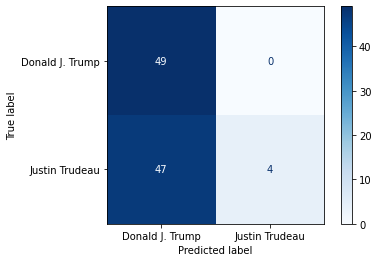

In [32]:
plot_confusion_matrix(count_model, X_test_tfidf, y_test, cmap='Blues')

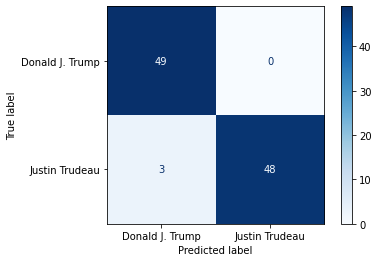

In [33]:
plot_confusion_matrix(count_model, X_test_count, y_test, cmap='Blues')

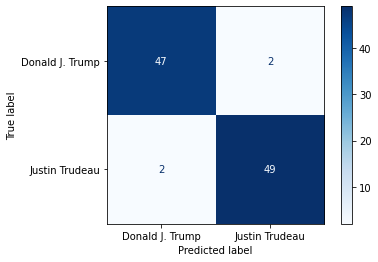

In [38]:
plot_confusion_matrix(svm_tfidf, X_test_tfidf, y_test, cmap='Blues')

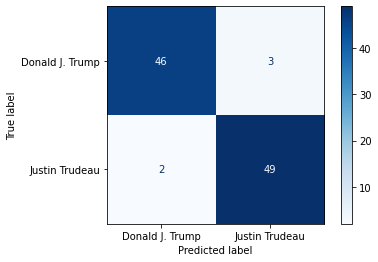

In [40]:
plot_confusion_matrix(svm_tfidf, X_test_count, y_test, cmap='Blues')